<font size="6">**Project definition**</font>

This projects aims at showing how an ANN can be trained and fitted to a classification problem. 

In [ ]:
#%pip install tensorflow

In [198]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
keras.__version__

'3.5.0'

<font size="3">**Load dataset**</font>

I load the Fashion MNIST dataset available in Keras.

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
X_train_full.shape , y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<font size="3">**Split dataset and define training, testing, and validation sets**</font>

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full , train_size = 55000, test_size = 5000, random_state = 42)

In [43]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

<font size="3">**Visualizing the data**</font>

In [112]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.29411765, 0.63529412, 0.71372549,
        0.69411765, 0.51372549, 0.05882353, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.67843137, 0.83529412, 0.32156863, 0.17254902,
        0.28627451, 0.56470588, 0.72941176, 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.45098039, 0.59607843, 0.        , 0.        , 0.        ,
        0.        , 0.    

In [123]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

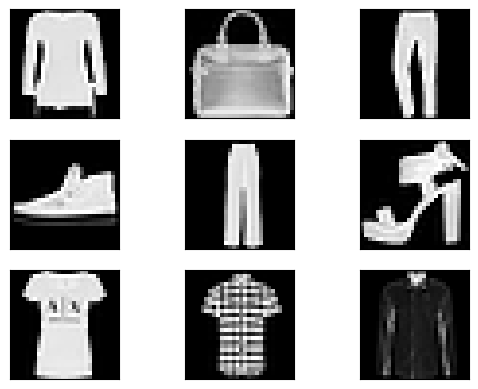

In [106]:
nrows = 3
ncols = 3
   
for i in range(1,10):
    plt.subplot(nrows, ncols, i)
    dataplot = X_train[i-1]
    plt.imshow(dataplot, cmap = 'gray')
    plt.yticks([])
    plt.xticks([])

<font size="3">**Defining an ANN model**</font>

In this section, an ANN is defined with:
1) one input layer accepting training images of 28 by 28 pixels which are presented in 2D arrays,
2) three hiddern layes with 200, 100, and 50 neurons, respectively; and 'ReLu' activation function
3) one output layer with 10 neurons representing 10 classes available in output data

Note: since this is a multi-class classification problem, I chose one neuron per class with 'softmax' activation fot he output layer.

In [171]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [173]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
weights, biases = model.layers[1].get_weights()

In [181]:
weights

array([[-0.04105721,  0.07343328, -0.07492124, ...,  0.00849136,
        -0.06548276, -0.04427574],
       [ 0.02849041,  0.00829037, -0.05187657, ...,  0.0074648 ,
        -0.05688751, -0.04854012],
       [ 0.02435287,  0.07683855,  0.00143129, ...,  0.02515671,
        -0.06443868, -0.02837446],
       ...,
       [ 0.00128112, -0.00744041,  0.02895698, ...,  0.06235211,
         0.07502519,  0.05981581],
       [ 0.07584399, -0.05202693,  0.06271762, ..., -0.05753195,
        -0.03378184,  0.06293714],
       [-0.00455356,  0.06801949, -0.02685203, ...,  0.07422867,
        -0.03811106, -0.06024199]], dtype=float32)

In [183]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Initial weights are random which is correct and the initial biases are all set to zero by default. Next, a few parameters are defined and the model gets compiled.

In [189]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

<font size="3">**Train and test the model**</font>

In this section, the model is trained and then evaluated by the testing data.

In [ ]:
train_model = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

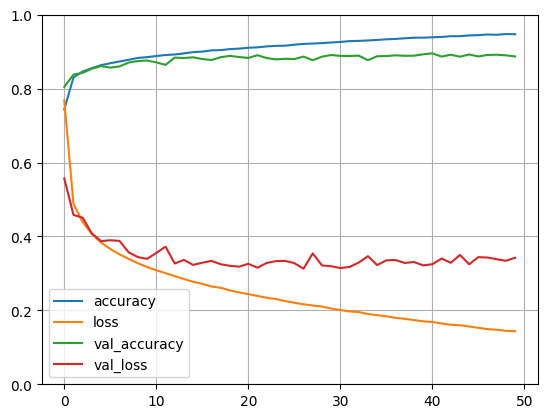

In [200]:
pd.DataFrame(train_model.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The performance measure (accuracy) seems much better on training set than validation set. It reached 94.7% on training set vs 88.7% on validation set. In addition, the loss is much smaller for trainign set than the validation set. In summary, it seems that the model has a bit overfitted on the training set. Next, we will reduce the epocs as well as the hidden layers, and display the results.

In [264]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
train_model = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), verbose = 0)

print(f'Accuracy on training set is {train_model.history['accuracy'][-1]}')
print(f'Loss on training set is {train_model.history['loss'][-1]}')
print(f'Accuracy on validation set is {train_model.history['val_accuracy'][-1]}')
print(f'Loss on validation set is {train_model.history['val_loss'][-1]}')

Accuracy on training set is 0.9143999814987183
Loss on training set is 0.23629289865493774
Accuracy on validation set is 0.8744000196456909
Loss on validation set is 0.35638362169265747


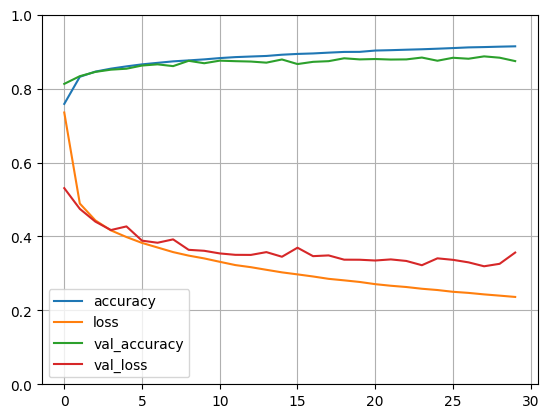

In [266]:
pd.DataFrame(train_model.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

This time the model is less overfitted than last time. Let's evaluate the model on testing set.

In [272]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8688 - loss: 0.3662


[0.3716413080692291, 0.866100013256073]

Accuracy on test set is close to those of validation set, indicating the model is not overfitted to the training set.